
# Introduction



This tutorial presents a few basic options for preparing 3D-printed visualizations from datasets that are available through the City of Toronto's [Open Data Portal](https://portal0.cf.opendata.inter.sandbox-toronto.ca/). 




# Preparation



Most of the processes used are software/language agnostic, but we strongly encourage you to acquire a baseline understanding of the modern Python data science ecosystem. These are a few important pieces that you'll want to set up:  

-   Make sure you have a working Python installation! Download Anaconda and follow its setup instructions if you don't already have a Python installation: [https://www.anaconda.com/download/](https://www.anaconda.com/download/)
-   You will need to install the following Python libraries: pandas, numpy, stat, matplotlib, seaborn, plotly. If you are using Anaconda, use "conda install-c anaconda *package-name*" from a command line. Alternatively, use pip or easy<sub>install</sub> or apt-get install python-*package-name*.
-   There is a difference between Python 2 and 3. You may need to familiarize yourself with it, depending on which version you decide to install.
-   Download and set up JupyterLab and/or Jupyter Notebook: [https://github.com/jupyterlab/jupyterlab](https://github.com/jupyterlab/jupyterlab)
-   Download Blender if you don't already use 3D modeling software (e.g. Maya): [https://www.blender.org/download/](https://www.blender.org/download/)
-   Download QGIS if you want to create maps and other geospatial data representations: [https://qgis.org/en/site/forusers/download.html](https://qgis.org/en/site/forusers/download.html)




# Data Sources



We will be using data from the City of Toronto's portal, but there are various other interesting datasets that you might consider working with. For example, you can collect and use your own biometric/self-tracking data if you have a wearable device like a fitbit. Kaggle provides lots of awesome datasets (the pokemon one is fun if you're working with kids): [https://kaggle.com/datasets](https://kaggle.com/datasets). Google has a dataset search tool: [https://toolbox.google.com/datasetsearch](https://toolbox.google.com/datasetsearch). 538 has plenty of interesting political, social, and sports-related datasets: [https://data.fivethirtyeight.com/](https://data.fivethirtyeight.com/). You might also familiarize yourself with the Open North community: [https://github.com/opennorth](https://github.com/opennorth).

There are various tools you can use to clean/munge/prepare your data, including Excel, Libre Office Calc, R, and many more. We prefer pandas, a Python library for data analysis. There are lots of great tutorials that will outline how to import and prepare data with pandas in an iPython/Jupyter notebook. Your best bet is to do the free datacamp tutorials if you're completely new to this stuff: [https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
That said, we recommend either starting with something simple or spending plenty of time familiarizing yourself with a dataset in a spreadsheet application before moving to pandas dataframes (even though we have included some very basic cleaning functions in the notebook cells below). 

For this exercise, we will be working with pedestrian data from the King Street Pilot Project. We scraped all the data from the monthly .pdf reports that city of Toronto has made available here: [https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/data-reports-background-materials/](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/data-reports-background-materials/)
The data is available in the *data* directory of the repository that contains this file.  




# Working with Data in a Python/Jupyter Notebook



Start by importing the necessary libraries:



In [17]:
import pandas as pd
import numpy as np
import stat as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

If you want, you can set a default figure size for charts:



In [18]:
plt.rcParams['figure.figsize'] = [10, 8]

Next, import your data. We have included a cleaned version of the dataset in the *data* directory. pvol is what is referred to as a "dataframe" in pandas terminology. You will often see the variable name df (e.g. df = pd.read<sub>csv</sub>('example.csv')).



In [19]:
pvol = pd.read_csv('data/king_pedestrian_volume.csv')

Set the index for the pandas dataframe you've created:



In [20]:
pvol.set_index('street')

,am_bathurst_baseline,am_bathurst_january,am_bathurst_february,am_bathurst_march,am_bathurst_april,am_bathurst_may,am_bathurst_june,am_spadina_baseline,am_spadina_january,am_spadina_february,...,pm_bay_april,pm_bay_may,pm_bay_june,pm_jarvis_baseline,pm_jarvis_january,pm_jarvis_february,pm_jarvis_march,pm_jarvis_april,pm_jarvis_may,pm_jarvis_june
street,,,,,,,,,,,,,,,,,,,,,
queen,1810,1640,1750,1760,1790,1960,1770,2000,1880,1790,...,4890,8340,9280,1320,1140,1300,1210,1300,1450,1460
king,2820,2680,2620,2590,2580,2890,2780,4150,3580,3690,...,5540,8060,8190,3370,3760,4050,3930,4060,3920,4080


Create some objects for each street. Normally, we wouldn't want such long names (and wide dataframes), but explaining the hows and whys of reshaping data is not in the scope of this tutorial. If you're interested, read Hadley Wickham's papers on the subject ([http://vita.had.co.nz/papers/tidy-data.html](http://vita.had.co.nz/papers/tidy-data.html)) or follow these instructions for reshaping data in pandas: [https://pandas.pydata.org/pandas-docs/stable/reshaping.html](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)



In [21]:
#### am objects
# bathurst
pvol_bathurst_am = pvol[['street',
                         'am_bathurst_baseline',
                         'am_bathurst_january',
                         'am_bathurst_february',
                         'am_bathurst_march',
                         'am_bathurst_april',
                         'am_bathurst_may',
                         'am_bathurst_june']]

# spadina
pvol_spadina_am = pvol[['street',
                        'am_spadina_baseline',
                        'am_spadina_january',
                        'am_spadina_february',
                        'am_spadina_march',
                        'am_spadina_april',
                        'am_spadina_may',
                        'am_spadina_june']]

# bay
pvol_bay_am = pvol[['street',
                    'am_bay_baseline',
                    'am_bay_january',
                    'am_bay_february',
                    'am_bay_march',
                    'am_bay_april',
                    'am_bay_may',
                    'am_bay_june']]

# jarvis
pvol_jarvis_am = pvol[['street',
                       'am_jarvis_baseline',
                       'am_jarvis_january',
                       'am_jarvis_february',
                       'am_jarvis_march',
                       'am_jarvis_april',
                       'am_jarvis_may',
                       'am_jarvis_june']]

#### pm objects
# bathurst
pvol_bathurst_pm = pvol[['street',
                         'pm_bathurst_baseline',
                         'pm_bathurst_january',
                         'pm_bathurst_february',
                         'pm_bathurst_march',
                         'pm_bathurst_april',
                         'pm_bathurst_may',
                         'pm_bathurst_june']]

# spadina
pvol_spadina_pm = pvol[['street',
                        'pm_spadina_baseline',
                        'pm_spadina_january',
                        'pm_spadina_february',
                        'pm_spadina_march',
                        'pm_spadina_april',
                        'pm_spadina_may',
                        'pm_spadina_june']]

# bay
pvol_bay_pm = pvol[['street',
                    'pm_bay_baseline',
                    'pm_bay_january',
                    'pm_bay_february',
                    'pm_bay_march',
                    'pm_bay_april',
                    'pm_bay_may',
                    'pm_bay_june']]

# jarvis
pvol_jarvis_pm = pvol[['street',
                       'pm_jarvis_baseline',
                       'pm_jarvis_january',
                       'pm_jarvis_february',
                       'pm_jarvis_march',
                       'pm_jarvis_april',
                       'pm_jarvis_may',
                       'pm_jarvis_june']]

Using the standard pandas plotting functions (which rely on matplotlib), you can prepare bare-bones static charts (you might use matplotlib or seaborn if you want greater customization options). There are lots of ways to adjust the colours if you want, but we like our charts to look like life savers ;-)



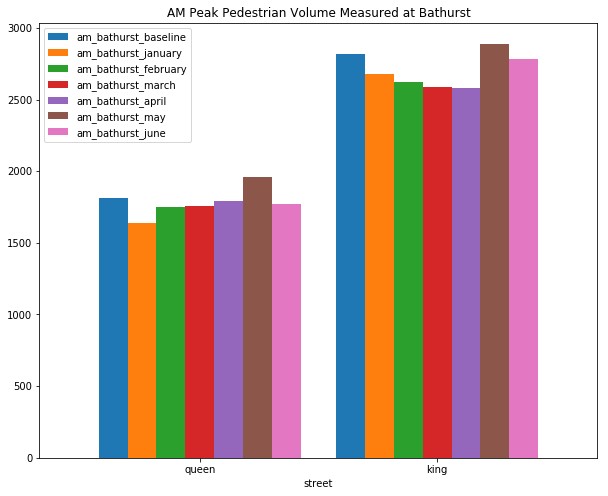

In [22]:
pvol_bathurst_am.plot.bar(x='street', 
                          rot=0,
                          width=0.85, 
                          title='AM Peak Pedestrian Volume Measured at Bathurst');

If you want horizontal charts, you can feed barh to the plot method:



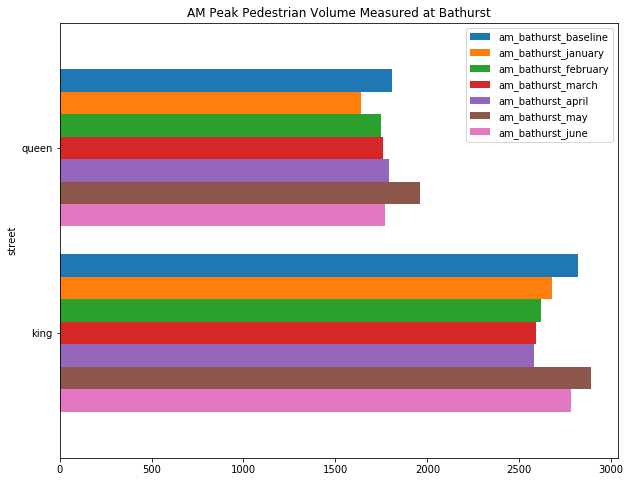

In [23]:
pvol_bathurst_am.plot.barh(x='street', 
                           rot=0,
                           width=0.85,
                           title='AM Peak Pedestrian Volume Measured at Bathurst')
plt.gca().invert_yaxis();

Far more interesting and useful is the potential for creating interactive charts inside a notebook. There are various libraries you can use (such as Bokeh or Pygal), but we find Plotly to be the most well-developed. It also has an easy-to-use web portal. What we're going to do next is create a grouped bar chart using Plotly's python library.



In [24]:
#### plotly-based grouped bar charts
# AM Bathurst
baseline = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_baseline'],
    name='AM Bathurst Baseline',
    hoverinfo='y+name'
)
january = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_january'],
    name='AM Bathurst January',
    hoverinfo='y+name'
)
february = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_february'],
    name='AM Bathurst February',
    hoverinfo='y+name'
)
march = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_march'],
    name='AM Bathurst March',
    hoverinfo='y+name'
)
april = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_april'],
    name='AM Bathurst April',
    hoverinfo='y+name'
)
may = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_may'],
    name='AM Bathurst May',
    hoverinfo='y+name'
)
june = go.Bar(
    x=pvol['street'],
    y=pvol['am_bathurst_june'],
    name='AM Bathurst June',
    hoverinfo='y+name'
)

data = [baseline, january, february, march, april, may, june]
layout = go.Layout(
    barmode='group',
    # bargap=0.15,
    bargroupgap=0.1,
    hovermode='closest'
    # showlegend=False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

This chart displays monthly average pedestrian counts for the morning rush at the intersections Bathurst/Queen and Bathurst/King. The dataframe provides options for the 7-10 am and 4-7 pm peak periods at the intersections of Bathurst, Spadina, Bay, and Jarvis (at both King and Queen). Change your arguments accordingly to prepare different - or multiple - charts.




# 3D Bars in Blender



Now, let's take these same charts that we've prepared for the screen and render them as 3D models. This section assumes that you have the csv and bpy modules available in your Python ecosystem. Depending on your operating system and Python configuration, they may be pre-loaded, or you may need to install and configure separately.

These steps have already been done, but are included for reference:

-   open king<sub>pedestrian</sub><sub>volume.csv</sub> in a spreadsheet application (calc or excel) and copy the entire row for king
-   open a new window/file and "paste special" with the transpose option to turn your row of data into a column
-   remove the "king" row at the top, then save as a new file called pvol<sub>king.csv</sub>
-   repeat these steps for queen



In [25]:
%%html
<img src="images/blender.gif">

-   referring to the image above, open up a "text editor" screen in Blender
-   open the 3Dbars.py script (that has been included in this repository) and use it to create 3D bars using the pvol<sub>king.csv</sub> and pvol<sub>queen.csv</sub> files (you'll need to run them separately)
-   when you are satisfied with the results, export an entire group or the entire street as .obj or .stl files




# Preparing 3D Data Maps



Now, we're going to switch to the recently-released [2016 Neighbourhood Profiles Dataset](https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a). (We had done a bunch of work with ward data in anticipation of the upcoming election, but it seems pretty irrelevant in light of recent events!) We're going to compare population growth between 2011 and 2016 (which is originally taken from the 2016 Census - [more info here](https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=CSD&Geo2=PR&Code2=01&Data=Count&SearchType=Begins&SearchPR=01&TABID=1&B1=All&Code1=3520005&SearchText=toronto)). There are plenty of interesting features of this dataset that you might consider using instead of population - language concentrations, income, citizenship, etc. We've already cleaned and processed the population data so it will play nice with QGIS. The raw and processed .csv files are in the *data* directory. 

**If you're going to use Excel or Calc to prep data for import into QGIS, here are some important steps:**

-   read this about setting up data for QGIS [http://www.qgis.nl/2012/07/13/koppelen-van-data-uit-csv-bestand/?lang=en](http://www.qgis.nl/2012/07/13/koppelen-van-data-uit-csv-bestand/?lang=en)
-   similar to the steps used with the King dataset, you'll want to cut the row you want and paste special into a new document, transposing the row into a column (this can also be done in pandas)
-   in order to get the appropriate scale in later 3D model, concatenate a decimal and zero to cell and copy down the column (you can also change the shapefile size parameters in QGIS, but that's a taller order)
-   (right click to) format first column and make sure it has leading zeroes to match the id values in the shapefile
-   make sure you have a csvt and follow the appropriate formula in current one - refer to this: [https://anitagraser.com/2011/03/07/how-to-specify-data-types-of-csv-columns-for-use-in-qgis/](https://anitagraser.com/2011/03/07/how-to-specify-data-types-of-csv-columns-for-use-in-qgis/)

**Here are some additional things you can do with pandas and numpy:** 

Depending on the data you use, you might have to re-scale to make it printable. Refer to the following image:



In [26]:
%%html
<img src="images/ladder2.gif">

Import the data:



In [27]:
df = pd.read_csv('data/neighbourhood_pop.csv', dtype=str) # dtype str will keep the leading zeroes
df.head()

,id,2011,2016
0,001,0.0341,0.033312
1,002,0.032788,0.032954
2,003,0.010138,0.01036
3,004,0.010488,0.010529
4,005,0.00955,0.009456


Set index to ID:



In [28]:
df.set_index('id', inplace=True)

Convert strings to floats in order to use numpy functions:



In [29]:
df['2011'] = df['2011'].astype(str).astype(float)
df['2016'] = df['2016'].astype(str).astype(float)

You can use numpy to convert to square root, logarithmic, or whatever other scale you like:



In [30]:
df['2016'] = np.sqrt(df['2016'])
df['2011'] = np.log10(df['2011'])
df.head()

,2011,2016
id,,
001,-1.467246,0.182516
002,-1.484285,0.181532
003,-1.994048,0.101784
004,-1.979307,0.102611
005,-2.019997,0.097242


When you're done processing, you can output a new .csv for import into QGIS (this has already been done):



In [31]:
df.to_csv('data/neighbourhood_pop_scaled.csv')


## Working in QGIS:



-   download the [neighbourhoods shapefile](https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#a45bd45a-ede8-730e-1abc-93105b2c439f) - you'll want the WGS84 coordinate system (we've included the files you need in the *data* directory)
-   use ctrl-shift-v to add a vector layer
-   select the entire .zip that you've downloaded and create your vector layer from it
-   import neighbourhood<sub>pop.csv</sub> as a vector layer (not as a delimited one)
-   join data from csv to existing shapefile - refer to [https://gis.stackexchange.com/questions/182281/how-to-join-data-from-excel-to-an-attribute-table-in-qgis-without-creating-dupli>](https://gis.stackexchange.com/questions/182281/how-to-join-data-from-excel-to-an-attribute-table-in-qgis-without-creating-dupli>)or the following image
-   save a new shapefile and edit column names if you wish



In [32]:
%%html
<img src="images/qgis.gif">


## Loading your Shapefile into Blender:



-   make sure you have the BlenderGIS plugin installed and configured: [https://github.com/domlysz/BlenderGIS](https://github.com/domlysz/BlenderGIS)
-   import the new shapefile that you've just created
-   set extrusion to the specific data column you want to use (in our example, 2011 or 2016 population)
-   set to extrude along z axis
-   if you want, separate the objects and create object names from the id field
-   change coordinates to WGS84 latlon
-   you might also add a base or make the objects solid (use solidify modifier) to make printing easier
-   as with the previous example, you'll want to export to .obj or .stl and make sure to set the scale, materials, and other export parameters to work with your 3D printing software (e.g. Cura, if you're using an Ultimaker)



In [33]:
%%html
<img src="images/shapefile.gif">


# 3D Printing Considerations



There are numerous software applications that you might use for preparing models prior to setting them up to print. You can likely do most of your prep in Blender, but the learning curve is steep. 

-   Meshlab is not very user friendly, but has a million features built into it (especially good for working with point clouds): [http://www.meshlab.net/](http://www.meshlab.net/)
-   Meshmixer has been the go-to processing tool for a long time, and has everything from sculpting tools to built-in printer export: [http://www.meshmixer.com/](http://www.meshmixer.com/)
-   Cotangent is a new application from the guy who developed Meshmixer. It has lots of interesting features, including better repair and slicing features, and is ideal for prepping 3D prints: [https://www.cotangent.io/](https://www.cotangent.io/)

**Some Useful Blender shortcuts:**

|keys|function|
|---
|a|select all|
|c|circle select|
|ctrl-lmb|lasso select|
|b|border select|
|ctrl-g|group selected objects|
|m|when object selected, move to specific layer|

**Some things to think about if you're preparing tactile models for blind users:** 

-   here's how you can install braille font in Blender [https://blender.stackexchange.com/questions/39437/braille-text-in-blender](https://blender.stackexchange.com/questions/39437/braille-text-in-blender)
-   you'll want to go into edit mode and extrude/bevel accordingly to make sure the dots are not too sharp
-   braille is very challenging to print - if you're using an FDM printer, be careful that traces of filament are not being dragged across the dots. you can configure your retraction, temperature, and speed settings to fix this: [https://ultimaker.com/en/resources/19504-how-to-fix-stringing](https://ultimaker.com/en/resources/19504-how-to-fix-stringing)

Printed tactile models do not have to be static! Think about how to separate your models into individual, reconfigurable/modular chunks in order to create dynamic data representations. It is easy to 3D print lego-like connectors onto the faces of your objects: [https://www.thingiverse.com/search?q=lego+brick&dwh=525baba295ab0da](https://www.thingiverse.com/search?q=lego+brick&dwh=525baba295ab0da). Additionally, attachable velcro tape gives you lots of options for creating endlessly modular graphics.

Remember, once you have a digital 3D data representation, it can usually be ported to any number of interaction contexts:

-   VR and gaming environments
-   Immersive point clouds and 3D scatter plots (not particularly printable, but they can be really engaging!)
-   Haptic/conductive extensions to tactile models

